# Initial Coin Offering Success Prediction

## Applied techniques:

* EDA
* Data Cleaning
* Data Preparation
* Modelling
    * Logistic Regression
    * Random Forest
    * BaggingClassifier()      
    * DecisionTreeClassifier()
    * GradientBoostingClassifier()
    * AdaBoostClassifier()
    * Neural Network
    * PCA
* Model Evaluation
* Best Model Selection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from datetime import datetime
import json
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler    
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.tree import plot_tree
from sklearn import svm
import math
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn import  metrics
from xgboost import XGBClassifier
from xgboost import plot_tree

from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
#df = pd.read_csv("ico2_remove token blank.csv")
df = pd.read_csv("ico3_remove token blank, remove tnum with epower.csv")

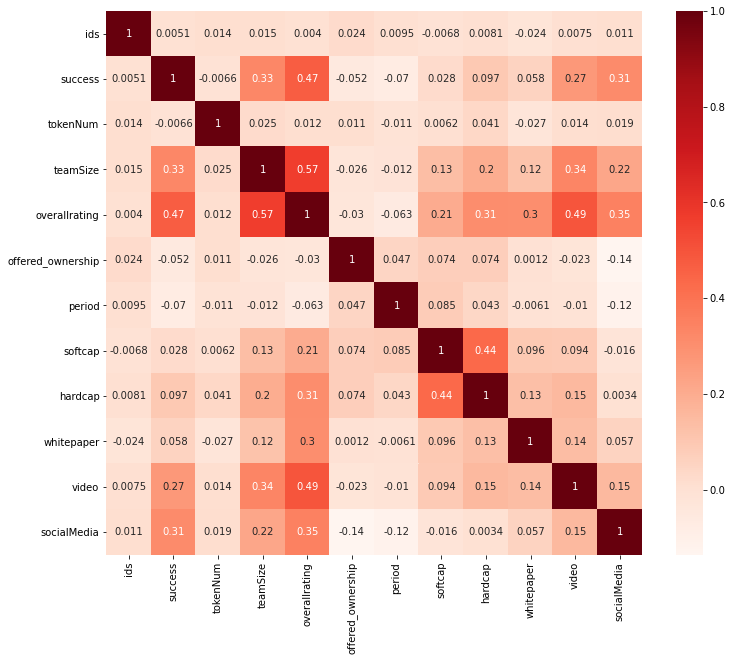

In [3]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<BarContainer object of 2 artists>

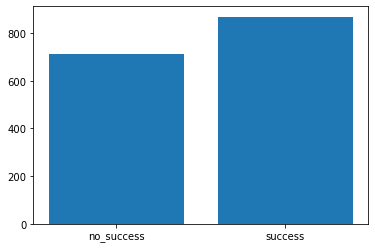

In [4]:
no_succ = df[df['success']==0].shape[0]
succ = df[df['success']==1].shape[0]
plt.bar(['no_success','success'], [no_succ, succ])

<AxesSubplot:xlabel='socialMedia,success'>

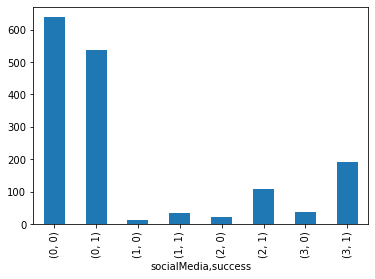

In [5]:
df.groupby(['socialMedia','success']).size().plot.bar()

In [6]:
#df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ids                1580 non-null   int64  
 1   success            1580 non-null   int64  
 2   token sub          402 non-null    object 
 3   tokenNum           1580 non-null   int64  
 4   teamSize           1580 non-null   int64  
 5   country            1580 non-null   object 
 6   categories         1580 non-null   object 
 7   overallrating      1580 non-null   float64
 8   offered_ownership  1580 non-null   float64
 9   enddate            1580 non-null   object 
 10  startdate          1580 non-null   object 
 11  end                1580 non-null   object 
 12  strt               1580 non-null   object 
 13  period             1580 non-null   int64  
 14  weekday            1580 non-null   object 
 15  month              1580 non-null   object 
 16  tokenName          1553 

# Dummy encode Category

In [7]:
ll = []
for index, row in df.iterrows():
    #print(row['categories'])
    cat = row['categories']
    x = cat.split(",")
    #print(type(x))
    for i in x:
        ll.append("cat_"+i)
print(len(ll))
print("Unique number of categories:",len(set(ll)))
print("Unique list of categories to be converted to columns are below:")
print(set(ll))
cat_list = set(ll)


4029
Unique number of categories: 29
Unique list of categories to be converted to columns are below:
{'cat_Big Data', 'cat_Manufacturing', 'cat_Tourism', 'cat_Energy', 'cat_Health', 'cat_Charity', 'cat_Internet', 'cat_Investment', 'cat_Other', 'cat_Communication', 'cat_Platform', 'cat_Education', 'cat_Infrastructure', 'cat_Cryptocurrency', 'cat_Media', 'cat_Art', 'cat_Virtual Reality', 'cat_Banking', 'cat_Smart Contract', 'cat_Retail', 'cat_Real estate', 'cat_Artificial Intelligence', 'cat_Sports', 'cat_Casino & Gambling', 'cat_Legal', 'cat_Software', 'cat_Electronics', 'cat_Business services', 'cat_Entertainment'}


In [8]:
print(len(df.columns))
df[['cat_Education', 'cat_Sports', 'cat_Infrastructure', 'cat_Manufacturing', 'cat_Tourism', 'cat_Business services', 'cat_Smart Contract', 'cat_Media', 'cat_Art', 'cat_Platform', 'cat_Big Data', 'cat_Health', 'cat_Cryptocurrency', 'cat_Legal', 'cat_Software', 'cat_Banking', 'cat_Retail', 'cat_Investment', 'cat_Casino & Gambling', 'cat_Artificial Intelligence', 'cat_Energy', 'cat_Virtual Reality', 'cat_Internet', 'cat_Charity', 'cat_Real estate', 'cat_Other', 'cat_Electronics', 'cat_Communication', 'cat_Entertainment']] = ""
len(df.columns)

27


56

In [9]:
k=0
for index, row in df.iterrows():
    k =k+1
    #if(k==6):
    #    break
    for col_name in cat_list:
        if(col_name.split("_")[1] in row['categories']):
            df.at[index, col_name] = 1
        else:
            df.at[index, col_name] = 0
#df.columns
#df[df['tokenNum']==12750000]
#df[['cat_Charity']]
#df.head()

In [10]:
print(len(df.columns))

56


In [11]:
df.to_csv('16july_cat_csv.csv')

# Dummy encode accepting currency

In [12]:
#df = pd.read_csv("ico2_remove token blank.csv")
ll = []
for index, row in df.iterrows():
    #print(row['categories'])
    cur = row['acceptingCurrency']
    #print("cur:", cur, "--")
    if(not pd.isna(cur) and cur is not None):
        x = cur.split(",")
        for i in x:
            val = i.strip()
            if(i not in ll):
                if(val=="етн"):
                    val = "eth"
                    #print("----yes---",index, i)
                if(val==""):
                    print("----blank-----",index, row["country"])
                ll.append("cur_"+val)
print(len(ll))
print("Unique number of currencies:",len(set(ll)))
print("Unique list of currencies to be converted to columns are below:")
print(set(ll))

curr_list = set(ll)
#curr_list

2970
Unique number of currencies: 76
Unique list of currencies to be converted to columns are below:
{'cur_ADA', 'cur_DASH', 'cur_LTC', 'cur_BCC', 'cur_XMR', 'cur_AGR', 'cur_NeoGAS', 'cur_XVG', 'cur_ZEC', 'cur_XLM', 'cur_ACE', 'cur_BLK', 'cur_DCT', 'cur_XRP', 'cur_ETH', 'cur_BTC', 'cur_EUR', 'cur_GAS', 'cur_FAIR', 'cur_PPC', 'cur_NEO', 'cur_TIME', 'cur_NXT', 'cur_GRC', 'cur_SALT', 'cur_ETP', 'cur_SIB', 'cur_ЕТН', 'cur_Litecoin', 'cur_GAME', 'cur_WIRE', 'cur_LTD', 'cur_LTС', 'cur_MAID', 'cur_ETC', 'cur_ZEN', 'cur_ALTS', 'cur_USD', 'cur_BitShares', 'cur_EOS', 'cur_DCR', 'cur_VET', 'cur_ECH', 'cur_STR', 'cur_MONERO', 'cur_Altcoins', 'cur_FIAT', 'cur_BTH', 'cur_BTG', 'cur_BNB', 'cur_OTHER', 'cur_NEM', 'cur_DALC', 'cur_Various', 'cur_XEM', 'cur_BCH', 'cur_Lightcoin', 'cur_SYS', 'cur_LA', 'cur_BTS', 'cur_DSH', 'cur_WAVES', 'cur_MIOTA', 'cur_QTUM', 'cur_EXP', 'cur_XBT', 'cur_SGD', 'cur_CHF', 'cur_COSS', 'cur_LSK', 'cur_GBP', 'cur_BHT', 'cur_ZAR', 'cur_DOGE', 'cur_USDT', 'cur_BCY'}


In [13]:
print(len(df.columns))
df[['cur_WIRE', 'cur_DCR', 'cur_LA', 'cur_Altcoins', 'cur_BCC', 'cur_XMR', 'cur_USD', 'cur_PPC', 'cur_DALC', 'cur_BCY', 'cur_BTH', 'cur_BLK', 'cur_MAID', 'cur_LSK', 'cur_DOGE', 'cur_QTUM', 'cur_DCT', 'cur_WAVES', 'cur_BCH', 'cur_XBT', 'cur_FIAT', 'cur_SALT', 'cur_XLM', 'cur_EXP', 'cur_BTS', 'cur_NXT', 'cur_ZAR', 'cur_ЕТН', 'cur_SGD', 'cur_GRC', 'cur_ECH', 'cur_ADA', 'cur_EOS', 'cur_Various', 'cur_BitShares', 'cur_Litecoin', 'cur_USDT', 'cur_LTD', 'cur_ZEC', 'cur_EUR', 'cur_DSH', 'cur_BTG', 'cur_ZEN', 'cur_GAME', 'cur_XVG', 'cur_ALTS', 'cur_ETC', 'cur_ETH', 'cur_GAS', 'cur_STR', 'cur_VET', 'cur_AGR', 'cur_ETP', 'cur_SYS', 'cur_GBP', 'cur_CHF', 'cur_LTC', 'cur_XEM', 'cur_XRP', 'cur_LTС', 'cur_BHT', 'cur_BNB', 'cur_MONERO', 'cur_MIOTA', 'cur_SIB', 'cur_OTHER', 'cur_NEO', 'cur_BTC', 'cur_COSS', 'cur_NEM', 'cur_NeoGAS', 'cur_TIME', 'cur_FAIR', 'cur_Lightcoin', 'cur_ACE', 'cur_DASH']] = "" # fill in
len(df.columns)


56


132

In [14]:
k=0
for index, row in df.iterrows():
    k =k+1
#     if(k==2):
#         break
    #print("k=",k)
    for col_name in curr_list:
        #print(index)
        #print("col_name.split--",col_name.split("_")[1])
        #print(col_name, "--- ",row['acceptingCurrency'])
        #print("row['acceptingCurrency']",row['acceptingCurrency'])
        row_val = row['acceptingCurrency']
        #print("row_val:",row_val)
        #print("col_name:",col_name)
        
        if(pd.isna(row_val)):
            #print("--hello is nan---")
            df.at[index, col_name] = 0
        elif(col_name.split("_")[1] in row_val):
            #print("in match----",col_name)
            df.at[index, col_name] = 1
        else:
            df.at[index, col_name] = 0

In [15]:
df.to_csv('16july_cat_cur_csv.csv')

# Convert to dummy - week, month, country, token type, platform

In [16]:
df.columns.values

array(['ids', 'success', 'token sub', 'tokenNum', 'teamSize', 'country',
       'categories', 'overallrating', 'offered_ownership', 'enddate',
       'startdate', 'end', 'strt', 'period', 'weekday', 'month',
       'tokenName', 'tokenPrice', 'tokenType', 'platform',
       'acceptingCurrency', 'defaulted_Curr', 'softcap', 'hardcap',
       'whitepaper', 'video', 'socialMedia', 'cat_Education',
       'cat_Sports', 'cat_Infrastructure', 'cat_Manufacturing',
       'cat_Tourism', 'cat_Business services', 'cat_Smart Contract',
       'cat_Media', 'cat_Art', 'cat_Platform', 'cat_Big Data',
       'cat_Health', 'cat_Cryptocurrency', 'cat_Legal', 'cat_Software',
       'cat_Banking', 'cat_Retail', 'cat_Investment',
       'cat_Casino & Gambling', 'cat_Artificial Intelligence',
       'cat_Energy', 'cat_Virtual Reality', 'cat_Internet', 'cat_Charity',
       'cat_Real estate', 'cat_Other', 'cat_Electronics',
       'cat_Communication', 'cat_Entertainment', 'cur_WIRE', 'cur_DCR',
       'cur_L

In [17]:
df_enc = df[['success', 'tokenNum', 'teamSize', 'country',
     'overallrating', 'offered_ownership', 'weekday', 'month', 'tokenType', 'platform',
        'softcap', 'hardcap',
       'whitepaper', 'video', 'socialMedia', 
      'cur_WIRE', 'cur_DCR', 'cur_LA', 'cur_Altcoins', 'cur_BCC', 'cur_XMR', 'cur_USD', 'cur_PPC', 'cur_DALC', 'cur_BCY', 'cur_BTH', 'cur_BLK', 'cur_MAID', 'cur_LSK', 'cur_DOGE', 'cur_QTUM', 'cur_DCT', 'cur_WAVES', 'cur_BCH', 'cur_XBT', 'cur_FIAT', 'cur_SALT', 'cur_XLM', 'cur_EXP', 'cur_BTS', 'cur_NXT', 'cur_ZAR', 'cur_ЕТН', 'cur_SGD', 'cur_GRC', 'cur_ECH', 'cur_ADA', 'cur_EOS', 'cur_Various', 'cur_BitShares', 'cur_Litecoin', 'cur_USDT', 'cur_LTD', 'cur_ZEC', 'cur_EUR', 'cur_DSH', 'cur_BTG', 'cur_ZEN', 'cur_GAME', 'cur_XVG', 'cur_ALTS', 'cur_ETC', 'cur_ETH', 'cur_GAS', 'cur_STR', 'cur_VET', 'cur_AGR', 'cur_ETP', 'cur_SYS', 'cur_GBP', 'cur_CHF', 'cur_LTC', 'cur_XEM', 'cur_XRP', 'cur_LTС', 'cur_BHT', 'cur_BNB', 'cur_MONERO', 'cur_MIOTA', 'cur_SIB', 'cur_OTHER', 'cur_NEO', 'cur_BTC', 'cur_COSS', 'cur_NEM', 'cur_NeoGAS', 'cur_TIME', 'cur_FAIR', 'cur_Lightcoin', 'cur_ACE', 'cur_DASH',
       'cat_Education', 'cat_Sports', 'cat_Infrastructure', 'cat_Manufacturing', 'cat_Tourism', 'cat_Business services', 'cat_Smart Contract', 'cat_Media', 'cat_Art', 'cat_Platform', 'cat_Big Data', 'cat_Health', 'cat_Cryptocurrency', 'cat_Legal', 'cat_Software', 'cat_Banking', 'cat_Retail', 'cat_Investment', 'cat_Casino & Gambling', 'cat_Artificial Intelligence', 'cat_Energy', 'cat_Virtual Reality', 'cat_Internet', 'cat_Charity', 'cat_Real estate', 'cat_Other', 'cat_Electronics', 'cat_Communication', 'cat_Entertainment']]
df_enc.head() 

,success,tokenNum,teamSize,country,overallrating,offered_ownership,weekday,month,tokenType,platform,...,cat_Artificial Intelligence,cat_Energy,cat_Virtual Reality,cat_Internet,cat_Charity,cat_Real estate,cat_Other,cat_Electronics,cat_Communication,cat_Entertainment
0,0,12750000,14,Estonia,2.6,0.80,Thursday,March,ERC20,Ethereum,...,0,0,0,0,1,0,0,0,0,0
1,0,150000000,13,Singapore,2.1,0.70,Tuesday,July,ERC20,Ethereum,...,0,0,0,0,0,0,0,0,0,0
2,1,2220000000,9,Singapore,2.5,0.37,Saturday,November,ERC20,Ethereum,...,0,0,0,0,0,0,0,0,0,0
3,0,40000000,0,USA,1.5,0.80,Monday,March,ERC20,Ethereum,...,0,0,0,1,0,0,0,0,0,1
4,1,45000000,7,Mexico,2.1,0.50,Sunday,April,ERC20,Ethereum,...,1,0,0,1,0,1,0,0,0,0


In [18]:
df_one_hot_encoded_data = pd.get_dummies(df_enc, columns = ['weekday','month', 'country','tokenType', 'platform'])
#print(type(df_one_hot_encoded_data))
#print(df_one_hot_encoded_data.columns.values)
#print(df_one_hot_encoded_data)

In [19]:
print(len(df_one_hot_encoded_data))#1589
print(len(df_enc.columns))#123
print(len(df_one_hot_encoded_data.columns.values)) #331

1580
120
327


In [20]:
pd.set_option('display.max_rows', 1000)
len(df_one_hot_encoded_data.columns) #330
#list(df_one_hot_encoded_data.columns)

327

In [21]:
#df_one_hot_encoded_data.to_csv('16july1_csv.csv', encoding='utf-8')

In [22]:
df_mdl1 = df_one_hot_encoded_data
len(df_mdl1.columns)

327

In [23]:
cols = [ 'cur_WIRE', 'cur_DCR', 'cur_LA', 'cur_Altcoins', 'cur_BCC', 'cur_XMR', 'cur_USD', 'cur_PPC', 'cur_DALC', 'cur_BCY', 'cur_BTH', 'cur_BLK', 'cur_MAID', 'cur_LSK', 'cur_DOGE', 'cur_QTUM', 'cur_DCT', 'cur_WAVES', 'cur_BCH', 'cur_XBT', 'cur_FIAT', 'cur_SALT', 'cur_XLM', 'cur_EXP', 'cur_BTS', 'cur_NXT', 'cur_ZAR', 'cur_ЕТН', 'cur_SGD', 'cur_GRC', 'cur_ECH', 'cur_ADA', 'cur_EOS', 'cur_Various', 'cur_BitShares', 'cur_Litecoin', 'cur_USDT', 'cur_LTD', 'cur_ZEC', 'cur_EUR', 'cur_DSH', 'cur_BTG', 'cur_ZEN', 'cur_GAME', 'cur_XVG', 'cur_ALTS', 'cur_ETC', 'cur_ETH', 'cur_GAS', 'cur_STR', 'cur_VET', 'cur_AGR', 'cur_ETP', 'cur_SYS', 'cur_GBP', 'cur_CHF', 'cur_LTC', 'cur_XEM', 'cur_XRP', 'cur_LTС', 'cur_BHT', 'cur_BNB', 'cur_MONERO', 'cur_MIOTA', 'cur_SIB', 'cur_OTHER', 'cur_NEO', 'cur_BTC', 'cur_COSS', 'cur_NEM', 'cur_NeoGAS', 'cur_TIME', 'cur_FAIR', 'cur_Lightcoin', 'cur_ACE', 'cur_DASH',
      'cat_Education', 'cat_Sports', 'cat_Infrastructure', 'cat_Manufacturing', 'cat_Tourism', 'cat_Business services', 'cat_Smart Contract', 'cat_Media', 'cat_Art', 'cat_Platform', 'cat_Big Data', 'cat_Health', 'cat_Cryptocurrency', 'cat_Legal', 'cat_Software', 'cat_Banking', 'cat_Retail', 'cat_Investment', 'cat_Casino & Gambling', 'cat_Artificial Intelligence', 'cat_Energy', 'cat_Virtual Reality', 'cat_Internet', 'cat_Charity', 'cat_Real estate', 'cat_Other', 'cat_Electronics', 'cat_Communication', 'cat_Entertainment']

for item in cols:
    df_mdl1[item] = df_mdl1[item].astype("category").cat.codes +1

In [24]:
len(df_mdl1.columns)
# 317 derived, 
# success
# tokenNum,teamSize,overallrating,offered_ownership                            
# softcap,hardcap,whitepaper,video,socialMedia                                    

327

In [25]:
#df_mdl1["cat_Electronics"] = df_mdl1["cat_Electronics"].astype("category").cat.codes +1

In [26]:
print(df_mdl1.dtypes)

success                                        int64
tokenNum                                       int64
teamSize                                       int64
overallrating                                float64
offered_ownership                            float64
softcap                                        int64
hardcap                                        int64
whitepaper                                     int64
video                                          int64
socialMedia                                    int64
cur_WIRE                                        int8
cur_DCR                                         int8
cur_LA                                          int8
cur_Altcoins                                    int8
cur_BCC                                         int8
cur_XMR                                         int8
cur_USD                                         int8
cur_PPC                                         int8
cur_DALC                                      

In [27]:
#pt= sns.heatmap(df_mdl1.corr(), annot=True, cmap = 'Reds')
#pt.savefig('corr.png')
kk=df_mdl1.corr()
kk.to_csv('out.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'out.csv'

In [28]:
# Create correlation matrix
corr_matrix = df_mdl1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['cur_PPC',
 'cur_BLK',
 'cur_GRC',
 'cur_GAME',
 'cur_SYS',
 'cur_TIME',
 'cur_FAIR',
 'cur_Lightcoin',
 'tokenType_EIP-20',
 'tokenType_ERC644',
 'tokenType_VeChain',
 'platform_Bitshares 2.0',
 'platform_CNET',
 'platform_Expanse',
 'platform_Keccak',
 'platform_MAHRA platform',
 'platform_Multichain',
 'platform_Neblio',
 'platform_QRC',
 'platform_QTUM',
 'platform_SpectroCoin',
 'platform_UNIVERSA',
 'platform_VeChain',
 'platform_X11']

In [29]:
df_mdl2 = df_mdl1.drop(df_mdl1[to_drop], axis=1)

In [30]:
len(df_mdl2.columns)

303

# Mdl 1 - Logistic reg

In [590]:
# #Correlation with output variable
# cor_target = abs(df_mdl1["success"])
# print(len(cor_target))
# #Selecting highly correlated features
# df_mdl1 = cor_target[cor_target>0.5]


In [41]:
# Scale tokenNum
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(df_mdl2[['tokenNum']])

In [42]:
type(X_train_minmax)
df_mdl2[['tokenNum']] = X_train_minmax

In [43]:
# Scale teamsz
# min_max_teamSz=MinMaxScaler()
# X_train_minmax_trainSz=min_max.fit_transform(df_mdl2[['teamSize']])
# df_mdl2[['teamSize']] = X_train_minmax_trainSz

In [44]:
#df_mdl1[['tokenNum']]

In [45]:
df_mdl2.to_csv('31july_cleaned_data.csv')

In [46]:
X = df_mdl2.drop(['success'],axis=1)   # independant features
y = df_mdl2[['success']   ]            # dependant variable

In [47]:
#y#X

In [48]:
#X.shape()
df_mdl2['success'].value_counts()

1    869
0    711
Name: success, dtype: int64

In [49]:
#df_mdl1.info()
#df_mdl1.info(verbose=True)

In [50]:
#df_mdl1.isna().any()

In [51]:
X.shape, y.shape

((1580, 302), (1580, 1))

In [52]:
#df_one_hot_encoded_data[(df_one_hot_encoded_data['country_Georgia']==1)] 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=90)

In [54]:
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((1106, 302), (474, 302), (1106, 1), (474, 1))

In [55]:
#X[0]

In [56]:
model_1_features = X.columns
model_1_features

Index(['tokenNum', 'teamSize', 'overallrating', 'offered_ownership', 'softcap',
       'hardcap', 'whitepaper', 'video', 'socialMedia', 'cur_WIRE',
       ...
       'platform_Stellar', 'platform_Stellar Consensus Protocol (SCP)',
       'platform_StreamSpace', 'platform_Tendermint', 'platform_ThePower',
       'platform_VASYA', 'platform_WAVES', 'platform_Waves',
       'platform_iOlite Blockchain', 'platform_x13'],
      dtype='object', length=302)

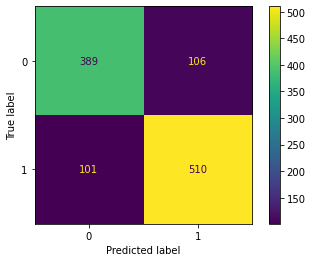

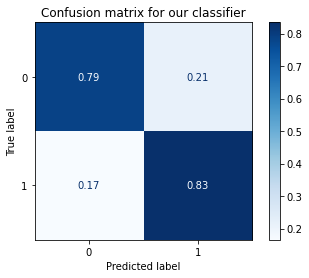

In [57]:
model=LogisticRegression(max_iter=600)
model.fit(X_train[model_1_features],y_train['success'])
#print(list(zip(model.coef_, model_1_features)))

plot_confusion_matrix(model, X_train, y_train)

# confusion matrix for train set
matrix = plot_confusion_matrix(model, X_train, y_train,cmap=plt.cm.Blues,normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [58]:
# Predict Train data 
y_predict_train=model.predict(X_train)
model_score=model.score(X_train,y_train)
len(y_predict_train) #1271
y_predict_train.shape
print(model_score)
print(metrics.confusion_matrix(y_train, y_predict_train))

0.8128390596745028
[[389 106]
 [101 510]]


The features in order of importance are:
month_July
cur_ETH
overallrating
country_Panama
country_Dubai
country_Germany
cur_BTS
country_China
cat_Health
country_Belarus
country_Malta


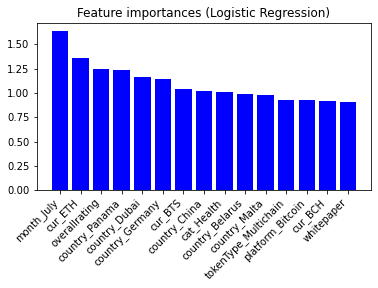

In [59]:
#Print feature importance column
indx = np.argsort(-abs(model.coef_[0,:]))
#print(indx)
print("The features in order of importance are:")
for i,feature in enumerate(X.columns[indx]):
    print(feature,)
    if i==10:
        break
#print(X.columns[indx]) 
#print(model.coef_.shape)#(1, 327)
# Plot feature importance
coefs = np.abs(model.coef_[0]) 
#print(coefs)

plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(15), coefs[indx[:15]], color="b", align="center")
plt.xticks(range(15), X.columns[indx[:15]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

In [60]:
# Predict using test dataset
pred=model.predict(X_test)
model_score=model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, pred))
#print(accuracy_score(y_test, pred))

0.7278481012658228
[[141  75]
 [ 54 204]]


In [295]:
#Cross val

In [296]:
cross_val_score(model, X_train, y_train, cv=10)

C:\Users\shilp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\shilp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\shilp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\shilp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

array([0.75590551, 0.7480315 , 0.72440945, 0.72440945, 0.77777778,
       0.76984127, 0.74603175, 0.76984127, 0.76984127, 0.72222222])

In [333]:
log_odds = model.coef_[0]
#print(log_odds)
pd.DataFrame(log_odds, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
month_July,1.662044
teamSize,1.443698
overallrating,1.335141
country_Pakistan,1.119657
country_Dubai,1.107269
country_Malta,1.046999
country_China,1.017267
month_August,0.903104
country_British Virgin Islands,0.880193
country_Israel,0.808263


In [61]:
#ROC Curve
# predict probabilities
pred_prob1 = model.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
print(p_fpr, " ", p_tpr)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score1

[0. 1.]   [0. 1.]


0.7939276485788114

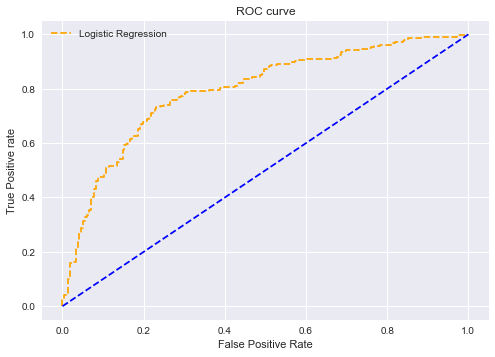

In [62]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
#plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Mdl 2 - Random Forest

In [336]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train[model_1_features],y_train['success'])


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [337]:
# Train accuracy

y_predict_train_rf=classifier.predict(X_train)
model_score_rf =classifier.score(X_train,y_train)
print(model_score_rf)
print(metrics.confusion_matrix(y_train, y_predict_train))

0.9833860759493671
[[441 125]
 [122 576]]


In [110]:
# Test accuracy

y_predict_test_rf=classifier.predict(X_test)
model_score_rf =classifier.score(X_test,y_test)
print(model_score_rf)
print(metrics.confusion_matrix(y_test, y_predict_test_rf))

0.7088607594936709
[[102  43]
 [ 49 122]]


The features in order of importance are:
overallrating
teamSize
tokenNum
offered_ownership
socialMedia
video
hardcap
softcap
cat_Platform
cat_Cryptocurrency
month_July


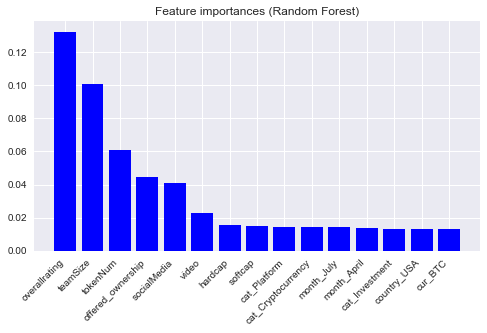

In [111]:
#Print feature importance column
#print(classifier.feature_importances_)
#indx = np.argsort(-abs(model.coef_[0,:]))
indx = np.argsort(-abs(classifier.feature_importances_))
#print(np.argsort(-(classifier.feature_importances_)))
print("The features in order of importance are:")
for i,feature in enumerate(X.columns[indx]):
    print(feature)
    if i==10:
        break
        
# Plot feature importance
#coefs = np.abs(classifier.feature_importances_)
#coefs = np.abs(model.coef_[0])
coefs = np.abs(classifier.feature_importances_)
#print(coefs)
plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(15), coefs[indx[:15]], color="b", align="center")
plt.xticks(range(15), X.columns[indx[:15]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

In [367]:
# Differnt code

rf = RandomForestClassifier(max_depth=None, criterion="entropy")

hps_dict = {
    "n_estimators": [10,20,50,100],
    "max_depth": [1,2,3,4,5,6,7,8,9,10,15,20,30,40,50]
}
CV = KFold(n_splits=5, shuffle=True, random_state=i)    
clf = GridSearchCV(rf, hps_dict, cv=CV,scoring='precision_macro')

clf.fit(X_train[model_1_features],y_train['success'])

print("Best parameters set found on development set:")
print(clf.best_params_)

print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
Y_true, Y_pred = y_test, clf.predict(X_test)
print(classification_report(Y_true, Y_pred))

C:\Users\shilp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shilp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shilp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters set found on development set:
{'max_depth': 8, 'n_estimators': 100}
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.75      0.63      0.69       145
           1       0.73      0.82      0.77       171

    accuracy                           0.74       316
   macro avg       0.74      0.73      0.73       316
weighted avg       0.74      0.74      0.73       316



In [113]:
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

NameError: name 'names' is not defined

In [114]:
from xgboost.core     import XGBoostError
#from lightgbm.sklearn import LightGBMError
from xgboost              import XGBClassifier
from sklearn.ensemble     import ExtraTreesClassifier
from sklearn.tree         import ExtraTreeClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import GradientBoostingClassifier
from sklearn.ensemble     import BaggingClassifier
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from lightgbm             import LGBMClassifier

from xgboost.core     import XGBoostError
from lightgbm.sklearn import LightGBMError

In [388]:
def plot_feature_importances(clf, X_train, y_train=None, top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    '''
    __name__ = "plot_feature_importances"

    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())
            score = clf.score(X_test, y_test)
            print("clf:", clf)
            print("score:", score)
            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
        
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

clf: BaggingClassifier()
score: 0.7151898734177216
BaggingClassifier does not have feature_importances_ attribute
clf: DecisionTreeClassifier()
score: 0.629746835443038


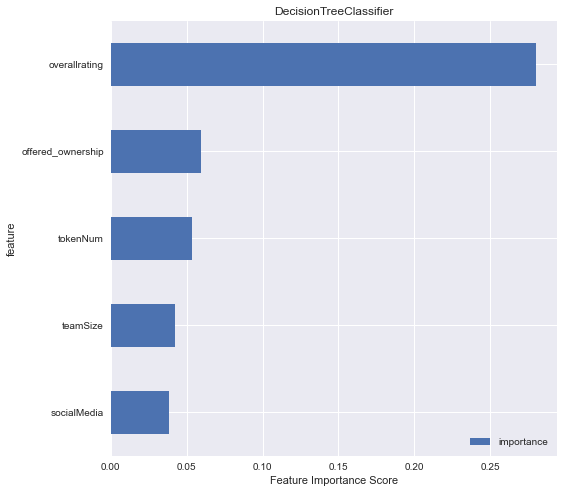

clf: GradientBoostingClassifier()
score: 0.7468354430379747


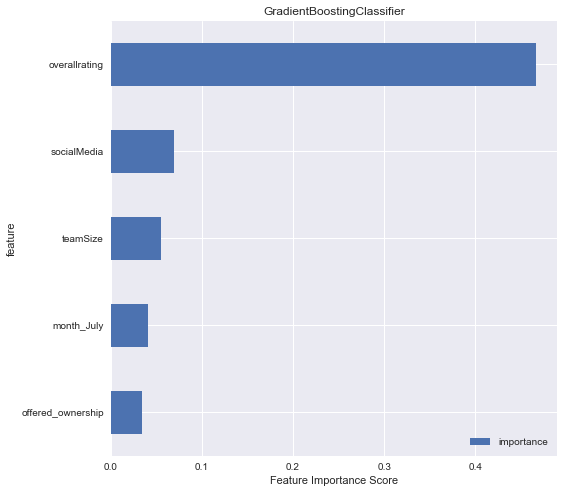

clf: LogisticRegression()
score: 0.7310126582278481
LogisticRegression does not have feature_importances_ attribute


C:\Users\shilp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


clf: AdaBoostClassifier()
score: 0.740506329113924


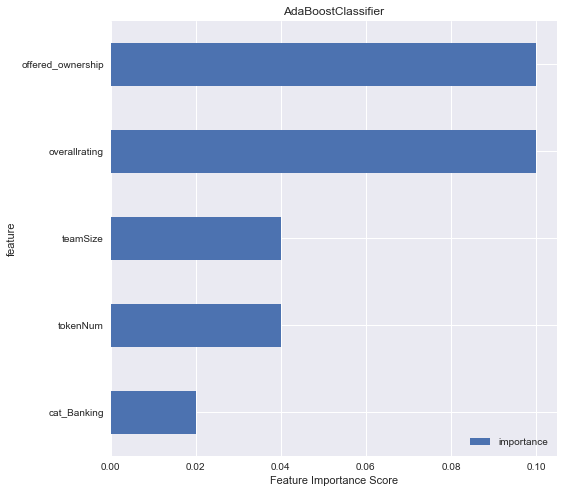

clf: RandomForestClassifier()
score: 0.7341772151898734


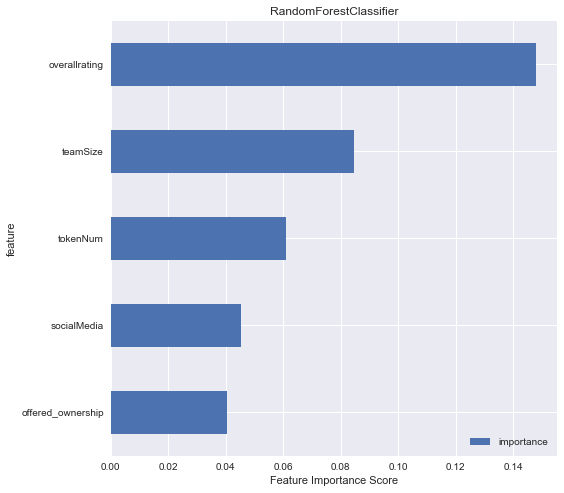

In [116]:

clfs = [#XGBClassifier(),              LGBMClassifier(), 
        #ExtraTreesClassifier(),       ExtraTreeClassifier(),
        BaggingClassifier(),          DecisionTreeClassifier(),
        GradientBoostingClassifier(), LogisticRegression(),
        AdaBoostClassifier(),         RandomForestClassifier()]

for clf in clfs:
    try:
       # _ = plot_feature_importances(clf, X_train, y_train, top_n=X_train.shape[1], title=clf.__class__.__name__)
        _ = plot_feature_importances(clf, X_train, y_train, top_n=5, title=clf.__class__.__name__)
    except AttributeError as e:
        print(e)

# Mdl 3 - SVM

In [338]:
svmclf = svm.SVC(  kernel = 'linear')
svmclf.fit(X_train, y_train)
testAcc = svmclf.score(X_test,y_test)
print(testAcc)
print(classification_report(y_test, svmclf.predict(X_test)))

C:\Users\shilp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7215189873417721
              precision    recall  f1-score   support

           0       0.71      0.66      0.69       145
           1       0.73      0.77      0.75       171

    accuracy                           0.72       316
   macro avg       0.72      0.72      0.72       316
weighted avg       0.72      0.72      0.72       316



<AxesSubplot:>

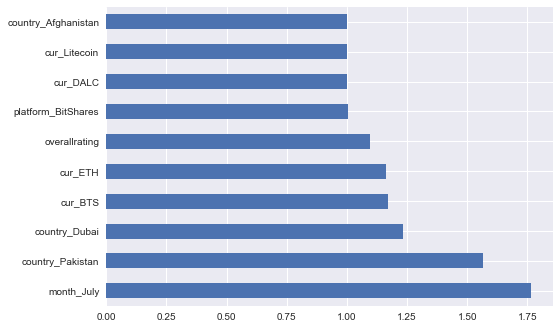

In [118]:
pd.Series(abs(svmclf.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

In [ ]:
# non linear

In [119]:
nlsvmclf = svm.NuSVC(gamma='auto')
nlsvmclf.fit(X_train, y_train)
testAcc = nlsvmclf.score(X_test,y_test)
print(testAcc)
print(classification_report(y_test, nlsvmclf.predict(X_test)))

C:\Users\shilp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7373417721518988
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       145
           1       0.75      0.77      0.76       171

    accuracy                           0.74       316
   macro avg       0.74      0.73      0.73       316
weighted avg       0.74      0.74      0.74       316



In [120]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
# plot the decision function for each datapoint on the grid
Z = nlsvmclf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

ValueError: X.shape[1] = 2 should be equal to 302, the number of features at training time

# Mdl 4 - XG Boost

In [122]:
modelxg = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(modelxg, X_train[model_1_features],y_train['success'], scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
#modelxg.fit(X_train[model_1_features],y_train['success'])

[0.77165354 0.72440945 0.66929134 0.75590551 0.78571429 0.68253968
 0.67460317 0.71428571 0.72222222 0.76984127 0.76377953 0.75590551
 0.70866142 0.70866142 0.75396825 0.73809524 0.72222222 0.66666667
 0.72222222 0.73015873 0.70866142 0.77165354 0.72440945 0.69291339
 0.73015873 0.70634921 0.72222222 0.72222222 0.72222222 0.71428571]
Accuracy: 0.725 (0.030)


In [123]:
modelxg1 = XGBClassifier()
modelxg1 = modelxg1.fit(X_train[model_1_features],y_train['success'])
# plot_tree(modelxg1)
# plt.figure(figsize = (50,55))
# plt.show()

C:\Users\shilp\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [124]:
type(X_train.dtypes)

pandas.core.series.Series

In [125]:
# another way of xgboost

def auc(m, train, test): 
    return (metrics.roc_auc_score(train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(test,m.predict_proba(test)[:,1]))

# Parameter Tuning
model = XGBClassifier()
param_dist = {"max_depth": [10,30,50,70],
              "min_child_weight" : [1,3,6,10],
              "n_estimators": [200,300],
              "learning_rate": [0.05, 0.1,0.16,0.01],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 2, 
                                   verbose=10, n_jobs=-1,scoring="roc_auc")
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

model = XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)
model.fit(X_train,y_train)



Fitting 2 folds for each of 128 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3

[16:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:53:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:53:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old beh

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.16, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=1,
              verbosity=None)

In [126]:
#auc(model, X_train, y_train)        
y_predict_test=model.predict(X_test)
score = model.score(X_test, y_test)
print("score test", score)#0.7264
print("roc test:", roc_auc_score(y_test, y_predict_test))

y_predict_train=model.predict(X_train)
model_score=model.score(X_train,y_train)
print("score train", model_score)
print("roc train:",roc_auc_score(y_train, y_predict_train))

#auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])


score test 0.7151898734177216
roc test: 0.7095785440613025
score train 1.0
roc train: 1.0


In [65]:
X_train.shape

(1106, 302)

# PCA

In [63]:
cov_matrix = np.cov(X_train)
cov_matrix
#X_train.shape

array([[1.18424464, 1.11941099, 0.7714892 , ..., 0.27400992, 0.9521938 ,
        1.22112223],
       [1.11941099, 1.09615367, 0.75720597, ..., 0.28518656, 0.92221489,
        1.17685795],
       [0.7714892 , 0.75720597, 0.57082203, ..., 0.26157507, 0.65287542,
        0.81328852],
       ...,
       [0.27400992, 0.28518656, 0.26157507, ..., 0.25835862, 0.28053589,
        0.28608792],
       [0.9521938 , 0.92221489, 0.65287542, ..., 0.28053589, 0.8280483 ,
        1.00578302],
       [1.22112223, 1.17685795, 0.81328852, ..., 0.28608792, 1.00578302,
        1.33832139]])

# PCA code and explained variance

In [113]:
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

pca = PCA(n_components =20)
X_centered = X_train - np.mean(X_train, axis=0)
X1_centered = X_test - np.mean(X_test, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / 1106
 
X_train_projected = pca.fit_transform(X_centered)
X_test_projected = pca.transform(X1_centered)
 
explained_variance = pca.explained_variance_ratio_
print("var:", explained_variance)
#print("comp:", pca.components_)
(pca.components_).shape


var: [0.88117607 0.01838944 0.00785674 0.00468764 0.0042827  0.00411131
 0.0035913  0.0031758  0.00281397 0.00261325 0.00245013 0.00233783
 0.00223289 0.00222788 0.00218147 0.00208846 0.00205606 0.00200025
 0.00186605 0.0018495 ]


(20, 302)

In [114]:
X_centered

,tokenNum,teamSize,overallrating,offered_ownership,softcap,hardcap,whitepaper,video,socialMedia,cur_WIRE,...,platform_Stellar,platform_Stellar Consensus Protocol (SCP),platform_StreamSpace,platform_Tendermint,platform_ThePower,platform_VASYA,platform_WAVES,platform_Waves,platform_iOlite Blockchain,platform_x13
736,-0.009394,5.95208,-0.551899,-0.057143,0.574141,0.300181,0.04792,0.322785,-0.627486,-0.000904,...,-0.003617,-0.000904,-0.000904,-0.000904,-0.000904,0.0,-0.000904,-0.037071,-0.000904,-0.000904
291,-0.009367,4.95208,0.148101,0.172857,0.574141,0.300181,0.04792,0.322785,-0.627486,-0.000904,...,-0.003617,-0.000904,-0.000904,-0.000904,-0.000904,0.0,-0.000904,-0.037071,-0.000904,-0.000904
1051,-0.008960,-1.04792,-0.351899,-0.057143,-0.425859,-0.699819,0.04792,0.322785,-0.627486,-0.000904,...,-0.003617,-0.000904,-0.000904,-0.000904,-0.000904,0.0,-0.000904,-0.037071,-0.000904,-0.000904
677,-0.004194,-6.04792,-0.551899,0.242857,0.574141,0.300181,0.04792,-0.677215,-0.627486,-0.000904,...,-0.003617,-0.000904,-0.000904,-0.000904,-0.000904,0.0,-0.000904,-0.037071,-0.000904,-0.000904
739,-0.008727,-8.04792,-0.851899,-0.057143,-0.425859,-0.699819,-0.95208,-0.677215,2.372514,-0.000904,...,-0.003617,-0.000904,-0.000904,-0.000904,-0.000904,0.0,-0.000904,-0.037071,-0.000904,-0.000904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,-0.004860,0.95208,1.348101,-0.207143,0.574141,0.300181,0.04792,0.322785,-0.627486,-0.000904,...,-0.003617,-0.000904,-0.000904,-0.000904,-0.000904,0.0,-0.000904,-0.037071,-0.000904,-0.000904
679,-0.008727,14.95208,0.648101,0.042857,0.574141,0.300181,0.04792,0.322785,-0.627486,-0.000904,...,-0.003617,-0.000904,-0.000904,-0.000904,-0.000904,0.0,-0.000904,-0.037071,-0.000904,-0.000904
1347,-0.007527,-10.04792,-0.951899,-0.057143,-0.425859,0.300181,0.04792,0.322785,-0.627486,-0.000904,...,-0.003617,-0.000904,-0.000904,-0.000904,-0.000904,0.0,-0.000904,-0.037071,-0.000904,-0.000904
671,-0.008727,1.95208,0.048101,0.292857,0.574141,0.300181,0.04792,-0.677215,-0.627486,-0.000904,...,-0.003617,-0.000904,-0.000904,-0.000904,-0.000904,0.0,-0.000904,-0.037071,-0.000904,-0.000904


In [115]:
print(X_train.shape)
print(X_train_projected.shape)
print(X_test_projected.shape)


(1106, 302)
(1106, 20)
(474, 20)


In [116]:
Xtrain_pca_2 = X_train_projected[0:1106, 0:2] #arr[1, 1:4]
print(Xtrain_pca_2)
print(type(Xtrain_pca_2))
#Xtrain_pca_2
Xtest_pca_2 =X_test_projected[0:474, 0:2] 

[[  5.88929219  -1.01455606]
 [  4.94449854  -0.86931922]
 [ -1.09075041  -0.58864131]
 ...
 [-10.09682288  -0.31454956]
 [  1.9218898   -0.8133242 ]
 [  7.0921514    2.26253806]]
<class 'numpy.ndarray'>


# First 2 Principal Components

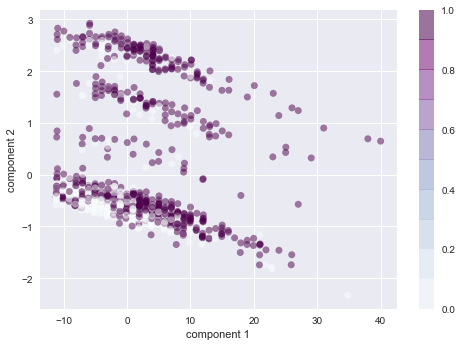

In [117]:
plt.scatter(X_train_projected[:, 0], X_train_projected[:, 1],
            c=y_train["success"], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('BuPu', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

#### Train Random Forest algorithm using the first 2 Principal components

In [118]:
# Train Random Forest algorithm using the first 2 Principal components
rf_final_pca = RandomForestClassifier(n_estimators=50, max_depth=40,min_samples_split=5)
rf_final_pca.fit(Xtrain_pca_2,y_train['success'])

Y_true, Y_pred = y_train, rf_final_pca.predict(Xtrain_pca_2)
print("-----PCA-Random Forest - Classification Report for Train-----")
print(classification_report(Y_true, Y_pred))
print("-----PCA-Random Forest - Classification Report for Test-----")
# Find test accuracy
Y_true, Y_pred = y_test, rf_final_pca.predict(Xtest_pca_2)
print(classification_report(Y_true, Y_pred))

-----PCA-Random Forest - Classification Report for Train-----
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       495
           1       0.96      0.97      0.96       611

    accuracy                           0.96      1106
   macro avg       0.96      0.96      0.96      1106
weighted avg       0.96      0.96      0.96      1106

-----PCA-Random Forest - Classification Report for Test-----
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       216
           1       0.68      0.73      0.71       258

    accuracy                           0.67       474
   macro avg       0.66      0.66      0.66       474
weighted avg       0.67      0.67      0.66       474



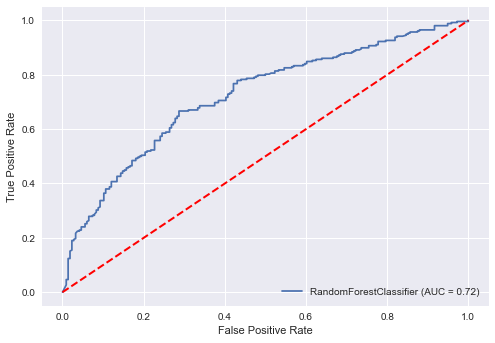

In [120]:
metrics.plot_roc_curve(rf_final_pca, Xtest_pca_2, Y_true)  # works but no diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')

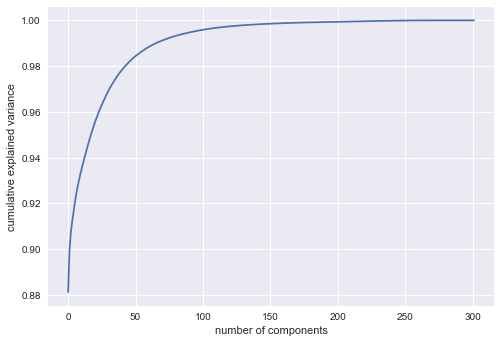

In [70]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [93]:
modelxgpca = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(modelxgpca, Xtrain_pca_2,y_train['success'], scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

[0.63963964 0.65765766 0.7027027  0.72972973 0.61261261 0.68468468
 0.71818182 0.7        0.65454545 0.68181818 0.64864865 0.71171171
 0.69369369 0.68468468 0.64864865 0.71171171 0.66363636 0.68181818
 0.65454545 0.74545455 0.61261261 0.74774775 0.68468468 0.71171171
 0.72072072 0.65765766 0.67272727 0.67272727 0.67272727 0.64545455]
Accuracy: 0.681 (0.034)


In [314]:
X_centered = X_train - np.mean(X_train, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / 1264
eigenvalues = pca.explained_variance_
evalsum=0
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print("vec:",np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    #print("evalues:",eigenvalue)
    evalsum = +eigenvalue


vec: 63.36962200896042
vec: 1.2549632074730932
vec: 0.5375629576368249
vec: 0.32206507965212605
vec: 0.2955994541842823
vec: 0.272171064478343
vec: 0.24544751189989966
vec: 0.21602741895484362
vec: 0.1873330478115174
vec: 0.1798486474889628
vec: 0.16814044673798062
vec: 0.1571866673120723
vec: 0.15606164425397523
vec: 0.1513102749510678
vec: 0.14789841927423164
vec: 0.14200462637635775
vec: 0.13965608743750024
vec: 0.13775776232525438
vec: 0.12778004224004427
vec: 0.12347730983165175
vec: 0.11818309965044628
vec: 0.11090158092781566
vec: 0.10792784861837974
vec: 0.10166441103817829
vec: 0.0985482498662868
vec: 0.09595584162215942
vec: 0.08997255621216724
vec: 0.08790973016567372
vec: 0.0864754053964554
vec: 0.08384387064951215
vec: 0.07958970460964737
vec: 0.07356110677534511
vec: 0.0696933314072326
vec: 0.06652281202718688
vec: 0.06457461848446987
vec: 0.06327493736914033
vec: 0.06018813520272123
vec: 0.05944160146755581
vec: 0.05532997964576908
vec: 0.05320894117466762
vec: 0.0478229

In [97]:
covariance_matrix = np.cov(X_centered.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
#print("Eigenvector: \n",eigen_vectors,"\n")
#print("Eigenvalues: \n", eigen_values, "\n")
# Calculating the explained variance on each of components
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
#print(variance_explained)
# Identifying components that explain at least 95%
cumulative_variance_explained = np.cumsum(variance_explained)
#print(cumulative_variance_explained)

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)
X_selected[0]

(1106, 10)


C:\Users\shilp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\shilp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\shilp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\shilp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


array([17. ,  2.3,  1. ,  1. ,  0. ,  1. ,  1. ,  0. ,  0. ,  0. ])

In [101]:
modelxg = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=3)
n_scores = cross_val_score(modelxg, Xtrain_pca_2,y_train['success'], scoring='accuracy', cv=cv, n_jobs=-1, error_score='error')
print(n_scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

[0.68468468 0.74774775 0.67567568 0.67567568 0.63963964 0.68468468
 0.69090909 0.64545455 0.72727273 0.73636364 0.72072072 0.7027027
 0.72072072 0.65765766 0.62162162 0.67567568 0.74545455 0.69090909
 0.70909091 0.63636364 0.64864865 0.73873874 0.67567568 0.7027027
 0.67567568 0.71171171 0.8        0.59090909 0.74545455 0.77272727]
Accuracy: 0.695 (0.046)


# Neural network

In [798]:
#https://towardsdatascience.com/pytorch-tabular-binary-classification-a0368da5bb89
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [799]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [800]:
EPOCHS = 35
BATCH_SIZE = 64
LEARNING_RATE = 0.001
len(df_mdl2.columns)

303

In [801]:
XX = df_mdl2.iloc[:, 1:303]
yy = df_mdl2.iloc[:, 0:1]
len(XX), len(df_mdl2)
print(XX.shape)

(1580, 302)


In [802]:
# # Create correlation matrix
# corr_matrix = XX.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find index of feature columns with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# (print(to_drop))
# # Drop features 
# XX = XX.drop(XX[to_drop], axis='columns',inplace=False)

# len(XX.columns), len(XX1.columns), len(df_mdl1.columns)

In [803]:
len(df_mdl2.columns)

303

In [804]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(XX, yy, test_size=0.30, random_state=80)

In [805]:
print(type(XX))
print(type(yy))
#type(X_train_nn)
#y_train_nn
(X_train_nn.shape,y_train_nn.shape )
#type(y_train_nn["success"])
#type(y_train_nn.iloc[:,0].values)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


((1106, 302), (1106, 1))

In [806]:
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_nn = scaler.transform(X_test_nn)
print(type(y_train_nn))
#print((X_train_nn))
y_train_nn=y_train_nn.iloc[:,0].values
print(type(y_train_nn))
y_train_nn

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [807]:
y_train_nn

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [808]:
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        #print("hi")
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        #print("hello")
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train_nn),  torch.FloatTensor(y_train_nn))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test_nn))

In [809]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [810]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [811]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(302, 128) 
        #self.layer_1 = nn.Linear(326, 128) 
        self.layer_2 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

# Neural Network Architecture

In [866]:
class binaryClassification4(nn.Module):
    def __init__(self):
        super(binaryClassification4, self).__init__()
        # Number of input features is 302
        self.layer_1 = nn.Linear(302, 254) 
        self.layer_2 = nn.Linear(254, 154) 
        self.layer_3 = nn.Linear(154, 84)
        self.layer_out = nn.Linear(84, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(254)
        self.batchnorm2 = nn.BatchNorm1d(154)
        self.batchnorm3 = nn.BatchNorm1d(84)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [813]:
class binaryClassification2(nn.Module):
    def __init__(self):
        super(binaryClassification2, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(302, 224) 
        #self.layer_1 = nn.Linear(326, 128) 
        self.layer_2 = nn.Linear(224, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_4 = nn.Linear(64, 16)
        self.layer_out = nn.Linear(16, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(224)
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        self.batchnorm4 = nn.BatchNorm1d(16)  
      
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)
        
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [814]:
class binaryClassification3(nn.Module):
    def __init__(self):
        super(binaryClassification3, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(302, 64) 
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

# Neural Network Model initilization

In [867]:
model = binaryClassification4()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

binaryClassification4(
  (layer_1): Linear(in_features=302, out_features=254, bias=True)
  (layer_2): Linear(in_features=254, out_features=154, bias=True)
  (layer_3): Linear(in_features=154, out_features=84, bias=True)
  (layer_out): Linear(in_features=84, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(254, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(154, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


# Neural Network training - binary classification model

In [868]:
model.train()
EPOCHS = 30
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        #print(type(y_pred), "---",type(y_batch))
        #print((y_pred).shape, "---",(y_batch).shape)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.67235 | Acc: 60.667
Epoch 002: | Loss: 0.41197 | Acc: 82.944
Epoch 003: | Loss: 0.30002 | Acc: 88.500
Epoch 004: | Loss: 0.23521 | Acc: 92.389
Epoch 005: | Loss: 0.16351 | Acc: 95.389
Epoch 006: | Loss: 0.10266 | Acc: 98.167
Epoch 007: | Loss: 0.07105 | Acc: 98.389
Epoch 008: | Loss: 0.05247 | Acc: 98.444
Epoch 009: | Loss: 0.03217 | Acc: 99.778
Epoch 010: | Loss: 0.02714 | Acc: 99.611
Epoch 011: | Loss: 0.02235 | Acc: 99.333
Epoch 012: | Loss: 0.02692 | Acc: 99.500
Epoch 013: | Loss: 0.02289 | Acc: 99.667
Epoch 014: | Loss: 0.01495 | Acc: 99.778
Epoch 015: | Loss: 0.01337 | Acc: 99.667
Epoch 016: | Loss: 0.02060 | Acc: 99.722
Epoch 017: | Loss: 0.02304 | Acc: 99.278
Epoch 018: | Loss: 0.05083 | Acc: 98.222
Epoch 019: | Loss: 0.07346 | Acc: 97.389
Epoch 020: | Loss: 0.10246 | Acc: 96.500
Epoch 021: | Loss: 0.05848 | Acc: 97.556
Epoch 022: | Loss: 0.04987 | Acc: 98.556
Epoch 023: | Loss: 0.04177 | Acc: 98.500
Epoch 024: | Loss: 0.03507 | Acc: 98.722
Epoch 025: | Los

In [869]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [870]:
confusion_matrix(y_test_nn, y_pred_list)


array([[131,  68],
       [ 73, 202]], dtype=int64)

In [871]:
print(classification_report(y_test_nn, y_pred_list))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       199
           1       0.75      0.73      0.74       275

    accuracy                           0.70       474
   macro avg       0.70      0.70      0.70       474
weighted avg       0.70      0.70      0.70       474



In [728]:
# testing the data type of columns

# numerical_feature=y_train_nn.dtypes[y_train_nn.dtypes!= 'object'].index
# categorical_feature=y_train_nn.dtypes[y_train_nn.dtypes== 'object'].index

# print ("There are {} numeric and {} categorical columns in train data".format(numerical_feature.shape[0],categorical_feature.shape[0]))

In [754]:
metrics_dict = classification_report(y_true=y_pred.cpu(), y_pred=y_test_pred.cpu(), output_dict=True)  

# fpr, tpr, thresholds = roc_curve(y_true=labels.cpu(), y_score=preds.cpu())  
# auc = roc_auc_score(y_true=labels.cpu(), y_score=preds.cpu())  

# fig = plt.figure()  
# plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))  
# plt.legend(loc="lower right")  
# plt.xlabel('False Positive Rate')  
# plt.ylabel('True Positive Rate')

ValueError: Found input variables with inconsistent numbers of samples: [48, 1]

# Testing


# Dummy encode weekday,month

In [ ]:
y = pd.get_dummies(df.month, prefix='month')
y.info()

In [ ]:
one_hot_encoded_data.corr()

In [ ]:
# corr = one_hot_encoded_data.corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

In [ ]:
x = df[["month"]]
yy = OneHotEncoder().fit_transform(x).toarray()
print(yy)
print(len(yy))

In [ ]:
y = pd.get_dummies(df.month, prefix='end')
y

In [ ]:
# Logistic reg
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    if(i==5):
        break
#plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [981]:
GaussX, GaussY = np.random.multivariate_normal(2,3,N1)

NameError: name 'N1' is not defined

In [ ]:
#31 july onwards

In [3]:
df31 = pd.read_csv("ico2_remove token blank.csv")

In [4]:
df31.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ids                1589 non-null   int64  
 1   success            1589 non-null   int64  
 2   token sub          402 non-null    object 
 3   tokenNum           1589 non-null   float64
 4   teamSize           1589 non-null   int64  
 5   country            1589 non-null   object 
 6   categories         1589 non-null   object 
 7   overallrating      1589 non-null   float64
 8   offered_ownership  1589 non-null   float64
 9   enddate            1589 non-null   object 
 10  startdate          1584 non-null   object 
 11  end                1589 non-null   object 
 12  strt               1584 non-null   object 
 13  period             1589 non-null   int64  
 14  weekday            1589 non-null   object 
 15  month              1589 non-null   object 
 16  tokenName          1562 

# -------GRID + CV-------------------------------------------------------------



In [ ]:
# from DS - original
NUM_TRIALS =  6
p_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 20, 25, 30, 35, 100]}

DT = DecisionTreeClassifier()
# Arrays to store scores and parameters
best_scores_no_cv = np.zeros(NUM_TRIALS)
best_scores_cv    = np.zeros(NUM_TRIALS)
best_params_cv    = np.zeros(NUM_TRIALS, dtype=np.int8)


# Loop for each trial
for i in range(NUM_TRIALS):
   

    # Choose cross-validation techniques
    CV = KFold(n_splits=4, shuffle=True, random_state=i)    

    # parameter search and scoring
    # refit should hold the main score that will be used for optimising the hyper parameters
    clf = GridSearchCV(estimator=DT, param_grid=p_grid, cv=CV, scoring='recall_macro')
    clf.fit(X_train, y_train)
    
    best_scores_cv[i] = clf.best_score_
    best_params_cv[i] = clf.best_params_['max_depth']    
    
    # get one of the splits score which gives us a score without averaging over other splits (as in cv)
    # which effectively gives us a score on a random split without cv in a cheap and easy way!
    
    # index of the best parameter   
    j = np.where(p_grid['max_depth']==best_params_cv[i])            
    best_scores_no_cv[i] = clf.cv_results_['split0_test_score'][j]
    
    print(best_params_cv[i], best_scores_cv[i], best_scores_no_cv[i])
        
print('Final Score for a DT Technique with CV = ', best_scores_cv.mean())  
print('Final Score for a DT Technique without CV = ', best_scores_no_cv.mean())  
unique, frequency = np.unique(best_params_cv, return_counts = True)
votes = np.c_[unique, frequency]
wining_param = unique[frequency.argmax()]
#wining_param = votes[votes[:,1].argmax(),0] # this equivalent to the above

print('max_depth votes \n',  votes)
print('max_depth with highest vote =', wining_param)

# GRID + CV - RF

In [765]:
# from DS
NUM_TRIALS =  10
# Loop for each trial
for i in range(NUM_TRIALS):
    # cross-validation technique
    CV = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)    
    rf = RandomForestClassifier()
    
    #Hyper parameter grid
    hps_dict = {
        "n_estimators": [10,20,50],
        "max_depth": [3,4,5,6,7,8,9,10,15,20,30,40,50],
        "min_samples_split": [2,3,4,5]
    }

    clf = GridSearchCV(rf, hps_dict, cv=CV,scoring='recall_macro')
    clf.fit(X_train[model_1_features],y_train['success'])

    print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
    print("accuracy :",clf.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 40, 'min_samples_split': 3, 'n_estimators': 50}
accuracy : 0.7593607954894936
tuned hpyerparameters :(best parameters)  {'max_depth': 50, 'min_samples_split': 4, 'n_estimators': 50}
accuracy : 0.7587356063502562
tuned hpyerparameters :(best parameters)  {'max_depth': 30, 'min_samples_split': 4, 'n_estimators': 50}
accuracy : 0.7503190849671273
tuned hpyerparameters :(best parameters)  {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50}
accuracy : 0.7454544963594234
tuned hpyerparameters :(best parameters)  {'max_depth': 30, 'min_samples_split': 3, 'n_estimators': 50}
accuracy : 0.7459171635339057
tuned hpyerparameters :(best parameters)  {'max_depth': 40, 'min_samples_split': 4, 'n_estimators': 50}
accuracy : 0.7528724437601397
tuned hpyerparameters :(best parameters)  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
accuracy : 0.7485455223392199
tuned hpyerparameters :(best parameters)  {'max_depth': 20, 'm

In [777]:
print("Best parameters set found on development set:")
print(clf.best_params_)

print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
Y_true, Y_pred = y_test, clf.predict(X_test)
print(classification_report(Y_true, Y_pred))

Best parameters set found on development set:
{'max_depth': 50, 'min_samples_split': 5, 'n_estimators': 50}
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       145
           1       0.72      0.81      0.77       171

    accuracy                           0.73       316
   macro avg       0.73      0.72      0.72       316
weighted avg       0.73      0.73      0.73       316



In [838]:
# Try RF with best parameters - RF
#CV = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)  
rf_final_mdl = RandomForestClassifier(n_estimators=50, max_depth=40,min_samples_split=5)
rf_final_mdl.fit(X_train[model_1_features],y_train['success'])

RandomForestClassifier(max_depth=40, min_samples_split=5, n_estimators=50)

In [119]:
# Find train accuracy
Y_true, Y_pred = y_train, rf_final_mdl.predict(X_train)
print("-----Random Forest Classification Report for Train-----")
print(classification_report(Y_true, Y_pred))
print("-----Random Forest Classification Report for Test-----")
# Find test accuracy
Y_true, Y_pred = y_test, rf_final_mdl.predict(X_test)
print(classification_report(Y_true, Y_pred))

NameError: name 'rf_final_mdl' is not defined

,overallrating,teamSize,tokenNum,socialMedia,offered_ownership,video,month_July,cat_Cryptocurrency,cat_Platform,hardcap,cur_BTC


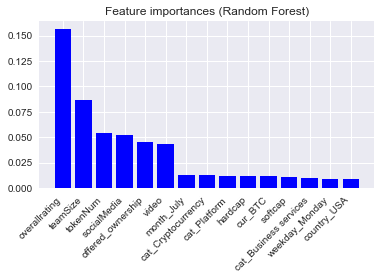

In [840]:
#Print feature importance column
#print(classifier.feature_importances_)
#indx = np.argsort(-abs(model.coef_[0,:]))
indx = np.argsort(-abs(rf_final_mdl.feature_importances_))
#print(np.argsort(-(classifier.feature_importances_)))
f_all = ""
for i,feature in enumerate(X.columns[indx]):
    #print(feature,)
    f_all = f_all +","+feature
    if i==10:
        break
print(f_all)
        
# Plot feature importance
#coefs = np.abs(classifier.feature_importances_)
#coefs = np.abs(model.coef_[0])
coefs = np.abs(rf_final_mdl.feature_importances_)
#print(coefs)
plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(15), coefs[indx[:15]], color="b", align="center")
plt.xticks(range(15), X.columns[indx[:15]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

Not normalized Confusion matrix
[[ 96  49]
 [ 30 141]]
Normalized Confusion matrix
[[0.66206897 0.33793103]
 [0.1754386  0.8245614 ]]


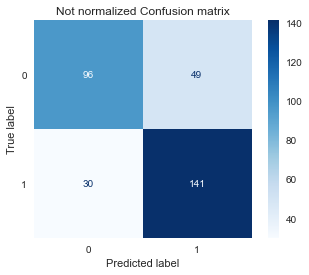

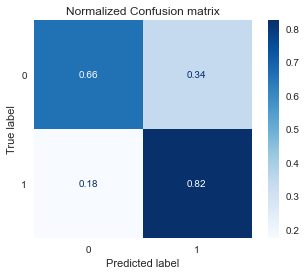

In [841]:
titles_options = [("Not normalized Confusion matrix", None),
                  ("Normalized Confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf_final_mdl, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.grid(False)
plt.show()

In [842]:
#ROC Curve
# predict probabilities
pred_prob_rf = rf_final_mdl.predict_proba(X_test)
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs_rf = [0 for i in range(len(y_test))]
p_fpr_rf, p_tpr_rf, _ = roc_curve(y_test, random_probs_rf, pos_label=1)
# roc curve for tpr = fpr 
#random_probs_rf = [0 for i in range(len(y_test))]
#p_fpr_rf, p_tpr_rf, _ = roc_curve(y_test, random_probs_rf, pos_label=1)
print(p_fpr_rf, " ", p_tpr_rf)

# auc scores
auc_score_rf = roc_auc_score(y_test, pred_prob_rf[:,1])
auc_score_rf

[0. 1.]   [0. 1.]


0.7962290784432345

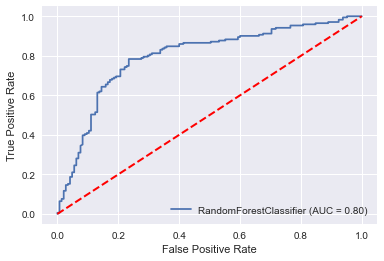

In [843]:
# matplotlib
# plt.style.use('seaborn')

# # plot roc curves
# plt.plot(fpr_rf, tpr_rf, linestyle='--',color='orange', label='Random forest')
# #plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
# plt.plot(p_fpr_rf, p_tpr_rf, linestyle='--', color='blue')
# # title
# plt.title('ROC curve')
# # x label
# plt.xlabel('False Positive Rate')
# # y label
# plt.ylabel('True Positive rate')

# plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
# plt.show();

metrics.plot_roc_curve(rf_final_mdl, X_test, y_test)  # works but no diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')

# GRID + CV - LR

In [776]:
import warnings
warnings.filterwarnings("ignore")
# from DS
NUM_TRIALS =  10

#DT = DecisionTreeClassifier()
# Arrays to store scores and parameters
best_scores_no_cv = np.zeros(NUM_TRIALS)
best_scores_cv    = np.zeros(NUM_TRIALS)
best_params_cv    = np.zeros(NUM_TRIALS, dtype=np.int8)
best_params_cv_est = np.zeros(NUM_TRIALS, dtype=np.int8)
best_params_cv_split= np.zeros(NUM_TRIALS, dtype=np.int8)
best_params_cv_solver= np.zeros(NUM_TRIALS, dtype=np.int8)
# Loop for each trial
for i in range(NUM_TRIALS):
   

    # Choose cross-validation techniques
    CV = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)    

    # parameter search and scoring
    # refit should hold the main score that will be used for optimising the hyper parameters
    #clf = GridSearchCV(estimator=DT, param_grid=p_grid, cv=CV, scoring='recall_macro')
    #clf.fit(X_train, y_train)
    
    #-------------------
    #rf = RandomForestClassifier(max_depth=None, criterion="entropy")
    lr_mdl=LogisticRegression()
#     hps_dict = {
#         'max_iter': [500,600],
#     # 'penalty' : ['l1', 'l2'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs', 'liblinear']
#     }
    grid={ 'max_iter': [600],"C": [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0], "penalty":["l1","l2"], "solver":['lbfgs','liblinear']}# l1 lasso l2 ridge
    clf1 = GridSearchCV(lr_mdl, grid, cv=CV,scoring='recall_macro')

    clf1.fit(X_train[model_1_features],y_train['success'])

    print("tuned hpyerparameters :(best parameters) ",clf1.best_params_)
    print("accuracy :",clf1.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.5, 'max_iter': 600, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.7548379012150674
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'max_iter': 600, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7492883431673435
tuned hpyerparameters :(best parameters)  {'C': 1.0, 'max_iter': 600, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.7461827753018477
tuned hpyerparameters :(best parameters)  {'C': 0.5, 'max_iter': 600, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.7403895554791207
tuned hpyerparameters :(best parameters)  {'C': 0.5, 'max_iter': 600, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7403570715070564
tuned hpyerparameters :(best parameters)  {'C': 0.5, 'max_iter': 600, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.7575455361171677
tuned hpyerparameters :(best parameters)  {'C': 0.5, 'max_iter': 600, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.7435706658636092
tuned hpyerparameters :(best

In [844]:
# Try RF with best parameters - LR
lr_final_mdl = LogisticRegression( max_iter= 600, C= 0.5,penalty= 'l2',solver= 'lbfgs')
lr_final_mdl.fit(X_train[model_1_features],y_train['success'])

LogisticRegression(C=0.5, max_iter=600)

In [845]:
# Find train accuracy
Y_true, Y_pred = y_train, lr_final_mdl.predict(X_train)
print("-----Classification Report for Train-----")
print(classification_report(Y_true, Y_pred))
print("-----Classification Report for Test-----")
# Find test accuracy
Y_true, Y_pred = y_test, lr_final_mdl.predict(X_test)
print(classification_report(Y_true, Y_pred))

-----Classification Report for Train-----
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       566
           1       0.82      0.83      0.82       698

    accuracy                           0.80      1264
   macro avg       0.80      0.80      0.80      1264
weighted avg       0.80      0.80      0.80      1264

-----Classification Report for Test-----
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       145
           1       0.74      0.80      0.77       171

    accuracy                           0.74       316
   macro avg       0.74      0.73      0.73       316
weighted avg       0.74      0.74      0.74       316



The features in order of importance are:
,month_July,overallrating,cur_ETH,cat_Health,whitepaper,month_August,country_China,country_Germany,country_Belgium,country_Malta,country_Dubai


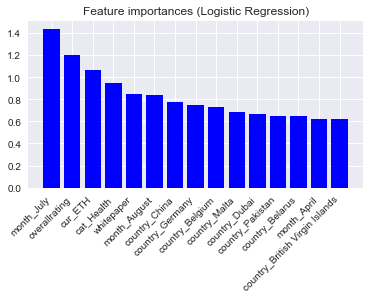

In [846]:
#Print feature importance column
indx = np.argsort(-abs(lr_final_mdl.coef_[0,:]))
#print(indx)
print("The features in order of importance are:")
f_all = ""
for i,feature in enumerate(X.columns[indx]):
    #print(feature,)
    f_all = f_all +","+feature
    if i==10:
        break
print(f_all)
        #print(X.columns[indx]) 
#print(model.coef_.shape)#(1, 327)
# Plot feature importance
coefs = np.abs(lr_final_mdl.coef_[0]) 
#print(coefs)

plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(15), coefs[indx[:15]], color="b", align="center")
plt.xticks(range(15), X.columns[indx[:15]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

Not normalized Confusion matrix
[[ 97  48]
 [ 35 136]]
Normalized Confusion matrix
[[0.66896552 0.33103448]
 [0.20467836 0.79532164]]


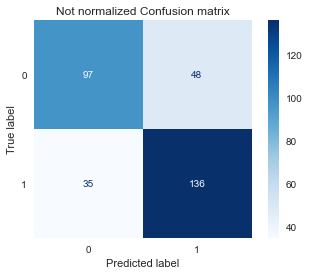

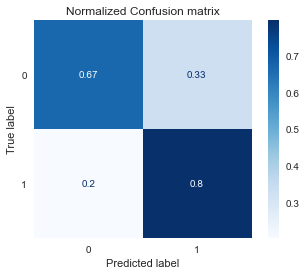

In [847]:
titles_options = [("Not normalized Confusion matrix", None),
                  ("Normalized Confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr_final_mdl, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.grid(False)
plt.show()

In [848]:
#ROC Curve
# predict probabilities
pred_prob_lr = lr_final_mdl.predict_proba(X_test)
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, pred_prob_lr[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs_lr = [0 for i in range(len(y_test))]
p_fpr_lr, p_tpr_lr, _ = roc_curve(y_test, random_probs_lr, pos_label=1)
# roc curve for tpr = fpr 
#random_probs_rf = [0 for i in range(len(y_test))]
#p_fpr_rf, p_tpr_rf, _ = roc_curve(y_test, random_probs_rf, pos_label=1)
print(p_fpr_lr, " ", p_tpr_lr)

# auc scores
auc_score_lr = roc_auc_score(y_test, pred_prob_lr[:,1])
auc_score_lr

[0. 1.]   [0. 1.]


0.8045977011494253

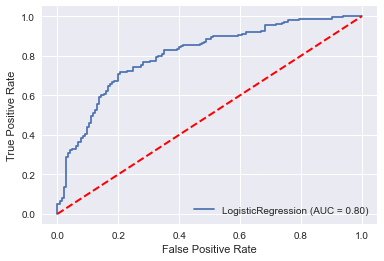

In [849]:
# matplotlib
# plt.style.use('seaborn')

# # plot roc curves
# plt.plot(fpr_lr, tpr_lr, linestyle='--',color='orange', label='LR')
# #plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
# plt.plot(p_fpr_lr, p_tpr_lr, linestyle='--', color='blue')
# # title
# plt.title('ROC curve')
# # x label
# plt.xlabel('False Positive Rate')
# # y label
# plt.ylabel('True Positive rate')

# plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
# plt.show();

metrics.plot_roc_curve(lr_final_mdl, X_test, y_test)  # works but no diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')

# GRID + CV - SVM

In [797]:
import warnings
warnings.filterwarnings("ignore")

NUM_TRIALS =10

# Loop for each trial
for i in range(NUM_TRIALS):
   
    # Choose cross-validation techniques
    CV = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)    

    svm_mdl=svm.SVC()
    grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}

    clf_svm = GridSearchCV(svm_mdl, grid, cv=CV,scoring='recall_macro')

    clf_svm.fit(X_train[model_1_features],y_train['success'])

    print("tuned hpyerparameters :(best parameters) ",clf_svm.best_params_)
    print("accuracy :",clf_svm.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
accuracy : 0.7490404729674205
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
accuracy : 0.7420151675521458
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
accuracy : 0.739104384192167
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
accuracy : 0.7419800177932353
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
accuracy : 0.7368845599889383
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
accuracy : 0.7563884776007475
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
accuracy : 0.7386867020169439
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
accuracy : 0.746395522806686
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'gamma': 1, 'kernel': 'linear

In [850]:
# Try RF with best parameters - SVM
#svm_final_mdl = svm.SVC( kernel= 'linear',probability=True)
svm_final_mdl = svm.SVC( C= 100, gamma= 0.001, kernel= 'linear',probability=True)

svm_final_mdl.fit(X_train[model_1_features],y_train['success'])

SVC(C=100, gamma=0.001, kernel='linear', probability=True)

In [851]:
# Find train accuracy
Y_true, Y_pred = y_train, svm_final_mdl.predict(X_train)
print("-----Classification Report for Train-----")
print(classification_report(Y_true, Y_pred))
print("-----Classification Report for Test-----")
# Find test accuracy
Y_true, Y_pred = y_test, svm_final_mdl.predict(X_test)
print(classification_report(Y_true, Y_pred))

-----Classification Report for Train-----
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       566
           1       0.87      0.84      0.86       698

    accuracy                           0.84      1264
   macro avg       0.84      0.84      0.84      1264
weighted avg       0.84      0.84      0.84      1264

-----Classification Report for Test-----
              precision    recall  f1-score   support

           0       0.73      0.68      0.71       145
           1       0.75      0.79      0.77       171

    accuracy                           0.74       316
   macro avg       0.74      0.74      0.74       316
weighted avg       0.74      0.74      0.74       316



The features in order of importance are:
,platform_BitShares,cur_AGR,tokenType_QRC-20,cur_Litecoin,tokenType_QRC,cur_EOS,tokenType_NTP-1,country_Pakistan,cur_ETP,platform_CryptoKami,cur_QTUM


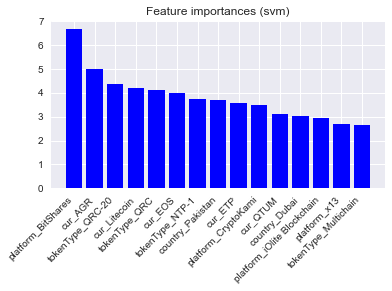

In [852]:
# feature impt
#Print feature importance column
indx = np.argsort(-abs(svm_final_mdl.coef_[0,:]))
#print(indx)
print("The features in order of importance are:")
f_all = ""
for i,feature in enumerate(X.columns[indx]):
    #print(feature,)
    f_all = f_all +","+feature
    if i==10:
        break
print(f_all)
        #print(X.columns[indx]) 
#print(model.coef_.shape)#(1, 327)
# Plot feature importance
coefs = np.abs(svm_final_mdl.coef_[0]) 
#print(coefs)

plt.figure()
plt.title("Feature importances (svm)")
plt.bar(range(15), coefs[indx[:15]], color="b", align="center")
plt.xticks(range(15), X.columns[indx[:15]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

Not normalized Confusion matrix
[[ 99  46]
 [ 36 135]]
Normalized Confusion matrix
[[0.68275862 0.31724138]
 [0.21052632 0.78947368]]


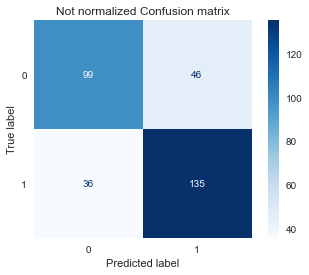

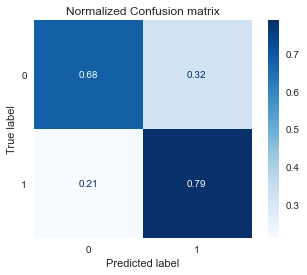

In [853]:
titles_options = [("Not normalized Confusion matrix", None),
                  ("Normalized Confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm_final_mdl, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.grid(False)
plt.show()

In [854]:
#ROC Curve
# predict probabilities
pred_prob_svm = svm_final_mdl.predict_proba(X_test)
fpr_svm, tpr_svm, thresh_svm = roc_curve(y_test, pred_prob_svm[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs_svm = [0 for i in range(len(y_test))]
p_fpr_svm, p_tpr_svm, _ = roc_curve(y_test, random_probs_svm, pos_label=1)
# roc curve for tpr = fpr 
#random_probs_rf = [0 for i in range(len(y_test))]
#p_fpr_rf, p_tpr_rf, _ = roc_curve(y_test, random_probs_rf, pos_label=1)
print(p_fpr_svm, " ", p_tpr_svm)

# auc scores
auc_score_svm = roc_auc_score(y_test, pred_prob_svm[:,1])
auc_score_svm

[0. 1.]   [0. 1.]


0.7772131478120589

In [855]:
# # matplotlib
# plt.style.use('seaborn')

# # plot roc curves
# plt.plot(fpr_svm, tpr_svm, linestyle='--',color='orange', label='SVM')
# #plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
# plt.plot(p_fpr_svm, p_tpr_svm, linestyle='--', color='blue')
# # title
# plt.title('ROC curve')
# # x label
# plt.xlabel('False Positive Rate')
# # y label
# plt.ylabel('True Positive rate')

# plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
# plt.show();

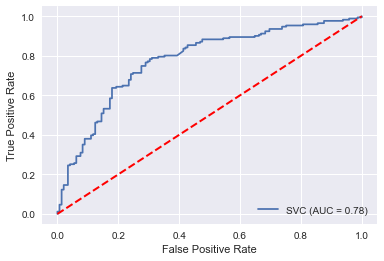

In [856]:
metrics.plot_roc_curve(svm_final_mdl, X_test, y_test)  # works but no diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')

# GRID + CV - XGBoost

In [821]:
NUM_TRIALS =2
warnings.filterwarnings("ignore")
# Loop for each trial
for i in range(NUM_TRIALS):
   
    # Choose cross-validation techniques
    CV = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)    

    xg_mdl=XGBClassifier(eval_metric='error')
    grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
    #grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}

    clf_xg = GridSearchCV(xg_mdl, grid, cv=CV,scoring='roc_auc')

    clf_xg.fit(X_train[model_1_features],y_train['success'])

    print("tuned hpyerparameters :(best parameters) ",clf_xg.best_params_)
    print("accuracy :",clf_xg.best_score_)

tuned hpyerparameters :(best parameters)  {'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.8}
accuracy : 0.8126932295657043
tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
accuracy : 0.8195213116557009


In [618]:
modelxg = XGBClassifier(colsample_bytree= 0.8, gamma= 5, max_depth= 5, min_child_weight= 5, subsample= 1.0)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(modelxg, X_train[model_1_features],y_train['success'], scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

[0.77470356 0.73517787 0.75494071 0.75098814 0.71825397 0.80632411
 0.70355731 0.75098814 0.71541502 0.76984127 0.77470356 0.73517787
 0.72727273 0.7312253  0.75      ]
Accuracy: 0.747 (0.026)


In [ ]:
# fig, ax = plt.subplots(figsize=(20, 20))
# plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
# plot.show()


In [825]:
xg_mdl_final =XGBClassifier(eval_metric='error',colsample_bytree= 0.6, gamma= 1.5, max_depth= 3, min_child_weight= 1, subsample= 1.0)
xg_mdl_final.fit(X_train[model_1_features],y_train['success'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='error',
              gamma=1.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [826]:
# Find train accuracy
Y_true, Y_pred = y_train, xg_mdl_final.predict(X_train)
print("-----Classification Report for Train-----")
print(classification_report(Y_true, Y_pred))
print("-----Classification Report for Test-----")
# Find test accuracy
Y_true, Y_pred = y_test, xg_mdl_final.predict(X_test)
print(classification_report(Y_true, Y_pred))

-----Classification Report for Train-----
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       566
           1       0.88      0.86      0.87       698

    accuracy                           0.86      1264
   macro avg       0.86      0.86      0.86      1264
weighted avg       0.86      0.86      0.86      1264

-----Classification Report for Test-----
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       145
           1       0.74      0.79      0.76       171

    accuracy                           0.73       316
   macro avg       0.73      0.73      0.73       316
weighted avg       0.73      0.73      0.73       316



Not normalized Confusion matrix
[[ 97  48]
 [ 36 135]]
Normalized Confusion matrix
[[0.66896552 0.33103448]
 [0.21052632 0.78947368]]


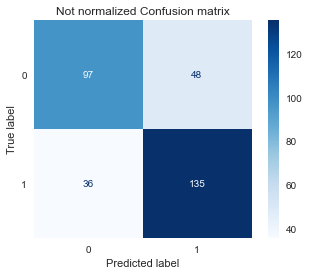

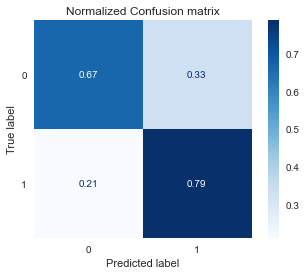

In [827]:
titles_options = [("Not normalized Confusion matrix", None),
                  ("Normalized Confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(xg_mdl_final, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.grid(False)
plt.show()

In [635]:
#ROC Curve
# predict probabilities
pred_prob_xg = xg_mdl_final.predict_proba(X_test)
fpr_xg, tpr_xg, thresh_xg = roc_curve(y_test, pred_prob_svm[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs_xg = [0 for i in range(len(y_test))]
p_fpr_xg, p_tpr_xg, _ = roc_curve(y_test, random_probs_xg, pos_label=1)
# roc curve for tpr = fpr 
#random_probs_rf = [0 for i in range(len(y_test))]
#p_fpr_rf, p_tpr_rf, _ = roc_curve(y_test, random_probs_rf, pos_label=1)
print(p_fpr_xg, " ", p_tpr_xg)

# auc scores
auc_score_xg = roc_auc_score(y_test, pred_prob_xg[:,1])
auc_score_xg

[0. 1.]   [0. 1.]


0.7875781407541843

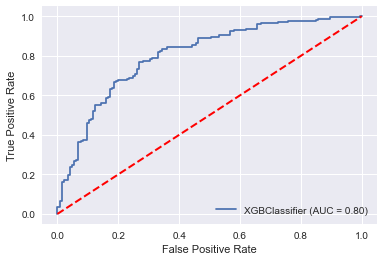

In [828]:
metrics.plot_roc_curve(xg_mdl_final, X_test, y_test)  # works but no diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')

,socialMedia,video,overallrating,teamSize,cur_USD,country_USA,month_July,cat_Cryptocurrency,whitepaper,month_August,month_April


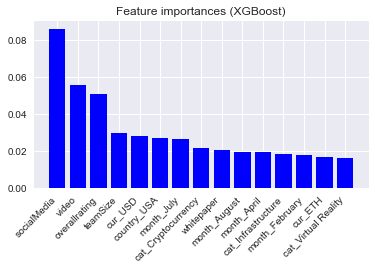

In [830]:

indx = np.argsort(-abs(xg_mdl_final.feature_importances_))
#print(np.argsort(-(classifier.feature_importances_)))
f_all = ""
for i,feature in enumerate(X.columns[indx]):
    #print(feature,)
    f_all = f_all +","+feature
    if i==10:
        break
print(f_all)
        
# Plot feature importance
#coefs = np.abs(classifier.feature_importances_)
#coefs = np.abs(model.coef_[0])
coefs = np.abs(xg_mdl_final.feature_importances_)
#print(coefs)
plt.figure()
plt.title("Feature importances (XGBoost)")
plt.bar(range(15), coefs[indx[:15]], color="b", align="center")
plt.xticks(range(15), X.columns[indx[:15]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

In [ ]:
#------------------------------------------------

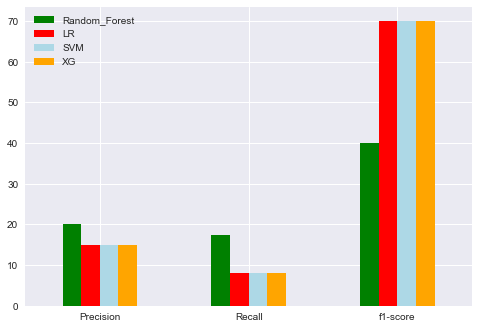

In [655]:
rf_val = [20, 17.5, 40]
lr_val = [15, 8, 70]
svm_val = [15, 8, 70]
xg_val = [15, 8, 70]
index = ['Precision', 'Recall', 'f1-score',]
df = pd.DataFrame({'Random_Forest': rf_val,
                    'LR': lr_val, 
                  'SVM': svm_val, 'XG': xg_val}, index=index)
ax = df.plot.bar(rot=0, color={"Random_Forest": "green", "LR": "red", "SVM": "lightblue", "XG": "orange"})